In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
filepath = "/Users/emiliodulay/Documents/Programming/Student Success Classification/student-success/data/expulsion.csv"
df = pd.read_csv(filepath)

In [60]:
# Exploratory Data Analysis
import matplotlib.cm as cm

# Visualizations

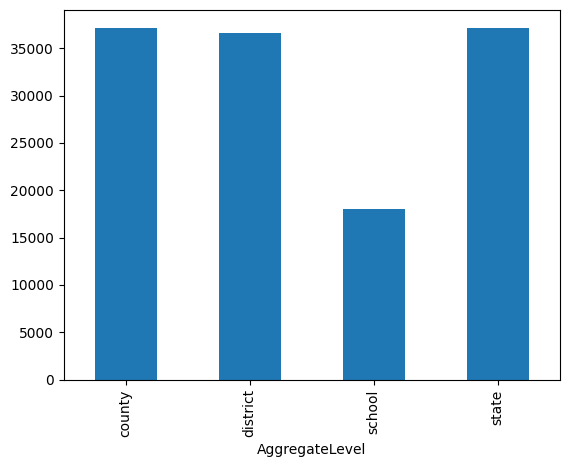

In [61]:
agg_level = df.groupby("AggregateLevel")["Expulsions Total"].sum()

agg_level.plot(kind = "bar")
plt.show()

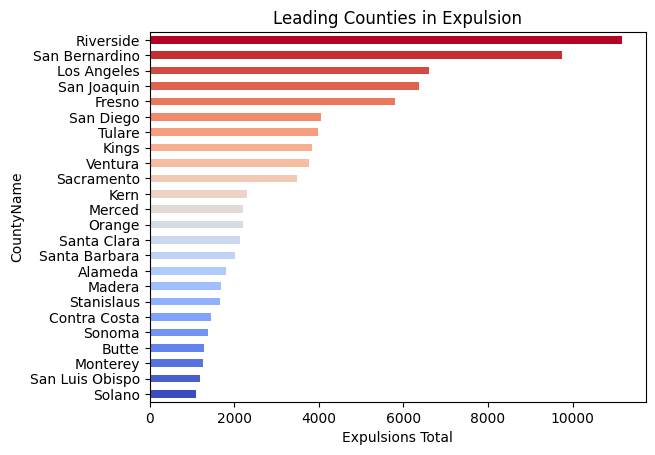

In [62]:

df_filter = df[df["CountyName"] != "State"] # filter the "State" county from the viz
county_level = df_filter.groupby("CountyName")["Expulsions Total"].sum()
county_level_filtered = county_level[county_level > 1000].sort_values()

num_bars = len(county_level_filtered)
colors = cm.coolwarm(np.linspace(0,1, num_bars))


county_level_filtered.plot(kind="barh", color = colors)
plt.title("Leading Counties in Expulsion")
plt.ylabel("CountyName")
plt.xlabel("Expulsions Total")
plt.show()


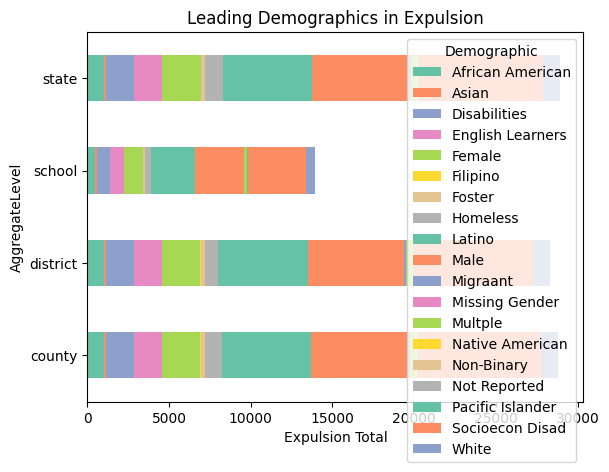

In [63]:
df_filter = df[df["Demographic"] != "Total"]
dem_pivot = df_filter.groupby(["AggregateLevel", "Demographic"])["Expulsions Total"].sum().unstack()


cmap1 = sns.color_palette("Set2")
dem_pivot.plot(kind = "barh", stacked = True,  color = cmap1)
plt.xlabel("Expulsion Total")
plt.title("Leading Demographics in Expulsion")
plt.show()


Text(0.5, 1.0, 'Expulsion by Aggregate Level and Demographic')

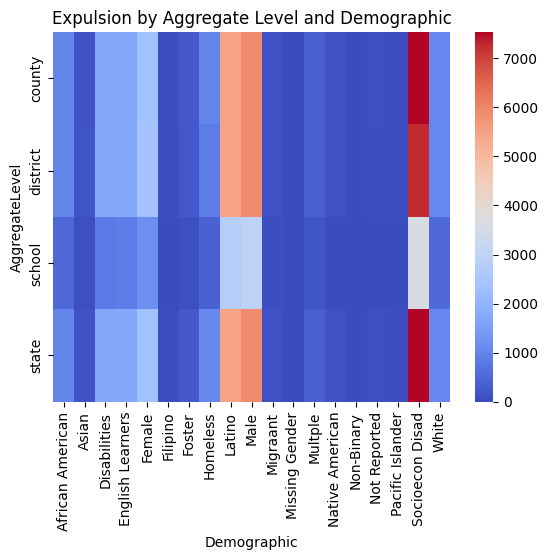

In [ ]:
sns.heatmap(dem_pivot, fmt = "g", cmap= "coolwarm")
plt.title("Expulsion by Aggregate Level and Demographic")

Text(0.5, 1.0, 'Demographic by Value Count, sorted by Aggregate Level')

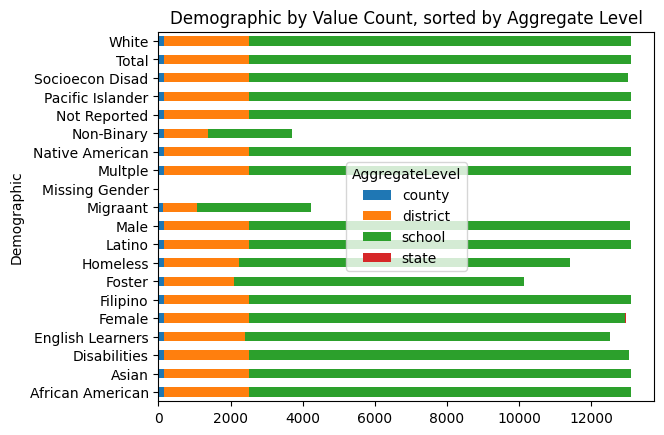

In [65]:
dem_by_agg = df.groupby(["AggregateLevel"])["Demographic"].value_counts().reset_index()
# Different agg levels: state, county, district, school
dem_by_agg[dem_by_agg["AggregateLevel"] == "school"]

dem_by_agg_pivot = dem_by_agg.pivot(index="Demographic", columns="AggregateLevel", values="count").fillna(0)
dem_by_agg_pivot.plot(kind= "barh", stacked = True)

plt.title("Demographic by Value Count, sorted by Aggregate Level")

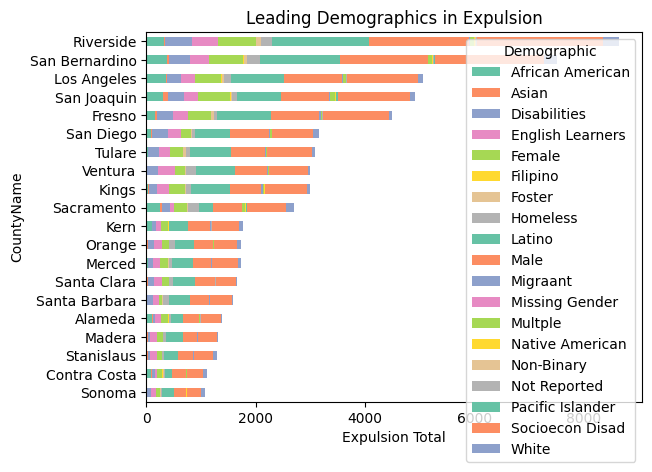

In [106]:
df_filter = df[(df["Demographic"] != "Total") & (df["CountyName"] != "State")]
dem_pivot = df_filter.groupby(["CountyName", "Demographic"])["Expulsions Total"].sum().unstack()

county_totals = dem_pivot.sum(axis = 1)
dem_pivot_filtered = dem_pivot[county_totals > 1000]


sorted_index = dem_pivot_filtered.sum(axis = 1).sort_values(ascending = False).index
dem_pivot_filtered_sorted = dem_pivot_filtered.loc[sorted_index[::-1]]



cmap1 = sns.color_palette("Set2")
dem_pivot_filtered_sorted.plot(kind = "barh", stacked = True,  color = cmap1)
plt.xlabel("Expulsion Total")
plt.title("Leading Demographics in Expulsion")
plt.show()

# Data Exploration

In [107]:
df.columns

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'Demographic', 'Enrollment Total', 'Expulsions Total',
       'Unduplicated Expulsion Total', 'Unduplicated Defiance',
       'Expulsion Rate (Total)', 'Violent-Injury', 'Violent-No Injury',
       'Weapon Possession', 'Drug', 'Defiance', 'Other'],
      dtype='object')

In [110]:
df["CountyName"].value_counts()

CountyName
Los Angeles        42308
San Diego          15865
Orange             12610
San Bernardino     11597
Riverside          10364
Santa Clara         8736
Fresno              7718
Alameda             7631
Sacramento          7630
Kern                6643
Contra Costa        5734
San Joaquin         5240
Tulare              5239
Sonoma              5233
Ventura             4770
Stanislaus          4763
San Mateo           4189
Monterey            3442
Santa Barbara       3220
Placer              3179
Merced              2762
Humboldt            2742
Shasta              2666
San Francisco       2407
Solano              2264
Butte               2176
Santa Cruz          2144
Marin               2067
San Luis Obispo     1980
Imperial            1957
Madera              1881
El Dorado           1877
Kings               1826
Mendocino           1741
Siskiyou            1521
Yolo                1496
Sutter              1420
Tehama              1261
Nevada              1086
Yuba          

In [ ]:
# New Data set that only includes the top 5

top5_county = ["Los Angeles", "San Diego", "Orange", "San Bernardino", "Riverside"]
top5_county_df = df[df["CountyName"].isin(top5_county)]
top5_county_df["CountyName"].value_counts()



CountyName
Los Angeles       42308
San Diego         15865
Orange            12610
San Bernardino    11597
Riverside         10364
Name: count, dtype: int64

In [119]:
top5_county_df.to_csv('top5_counties.csv', index=False)